<a href="https://colab.research.google.com/github/zugzwang03/Machine-Learning-Materials/blob/main/gradient_descent_optimization_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(0.5, name="weights")
model = tf.add(tf.multiply(x, w), 0.5)

cost = tf.reduce_mean(tf.square(model - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

Tensor("Mean_5:0", shape=(), dtype=float32)


In [ ]:
# Define the toy dataset
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# Create a TensorFlow session
with tf.Session() as sess:
	# Initialize the variables
	sess.run(tf.global_variables_initializer())

	# Training loop
	for i in range(1000):
		sess.run(train,
				feed_dict={x: x_train,
							y: y_train})

	# Evaluate the model
	w_val = sess.run(w)

# Mean Squared Error (MSE) between
# the predicted and true output values
print(w_val)

1.8333333


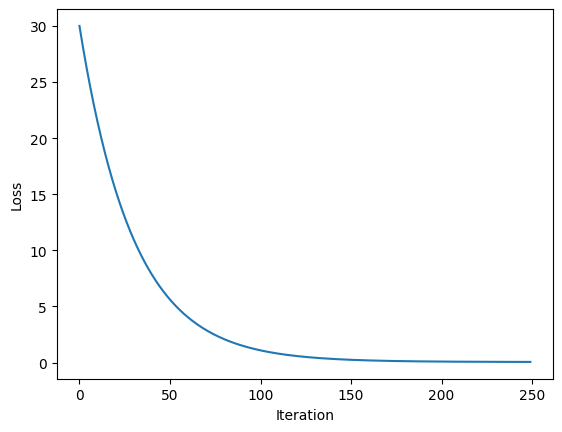

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = tf.constant([[1.], [2.], [3.], [4.]])
y = tf.constant([[2.], [4.], [6.], [8.]])

w = tf.Variable(0.)
b = tf.Variable(0.)

def model(x):
    return w * x + b

def loss(predicted_y, y):
    return tf.reduce_mean(tf.square(predicted_y - y))

learning_rate = 0.001

losses = []
for i in range(250):
    with tf.GradientTape() as tape:
        predicted_y = model(X)
        current_loss = loss(predicted_y, y)
    gradients = tape.gradient(current_loss, [w, b])
    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    losses.append(current_loss.numpy())

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

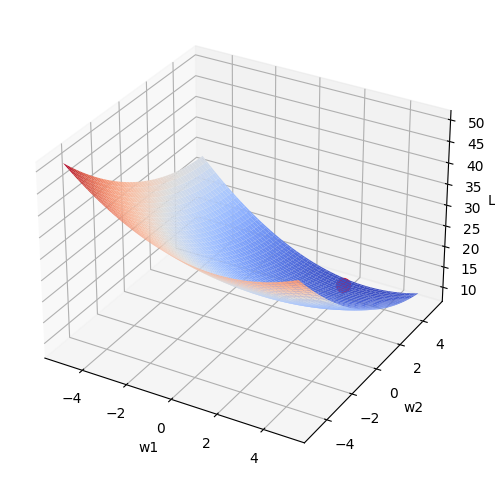

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 3 * X + np.random.randn(100, 1)

w = np.random.randn(2, 1)
b = np.random.randn(1)[0]

alpha = 0.1

num_iterations = 20

w1, w2 = np.meshgrid(np.linspace(-5, 5, 100),
                     np.linspace(-5, 5, 100))

loss = np.zeros_like(w1)

for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        loss[i, j] = np.mean((y - w1[i, j] * X - w2[i, j] * X**2)**2)

for i in range(num_iterations):
    grad_w1 = -2 * np.mean(X * (y - w[0] * X - w[1] * X**2))
    grad_w2 = -2 * np.mean(X**2 * (y - w[0] * X - w[1] * X**2))
    w[0] -= alpha * grad_w1
    w[1] -= alpha * grad_w2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w1, w2, loss, cmap='coolwarm')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')

ax.plot(w[0], w[1], np.mean((y - w[0] * X - w[1] * X**2)**2), 'o', c='red', markersize=10)
plt.show()